In [251]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/按日期单品合并.csv",encoding='utf-8',index_col='销售日期')
pl = pd.read_excel("../data/附件1.xlsx")
pl['单品编码'] = pl['单品编码'].astype(str)
pl = pl.set_index('单品编码')
print(pl)

                       单品名称        分类编码 分类名称
单品编码                                        
102900005115168        牛首生菜  1011010101  花叶类
102900005115199       四川红香椿  1011010101  花叶类
102900005115625      本地小毛白菜  1011010101  花叶类
102900005115748         白菜苔  1011010101  花叶类
102900005115762          苋菜  1011010101  花叶类
...                     ...         ...  ...
106958851400125   海鲜菇(袋)(4)  1011010801  食用菌
106971533450003      海鲜菇(包)  1011010801  食用菌
106971533455008   海鲜菇(袋)(3)  1011010801  食用菌
106973223300667   虫草花(盒)(2)  1011010801  食用菌
106973990980123  和丰阳光海鲜菇(包)  1011010801  食用菌

[251 rows x 3 columns]


In [252]:
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    temp = pd.DataFrame([])
    for index in df:
        plrow = pl.loc[index]
        if plrow['分类名称'] == types:
            name_CN = plrow['单品名称']
            temp[name_CN] = df[index]
    X = temp.T
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=4,random_state=666)
    km.fit(X) # 无监督学习，拟合的时候不需要样本标签
    y_predict = km.predict(X)  # 预测
    from sklearn.metrics import calinski_harabasz_score
    print(calinski_harabasz_score(X,y_predict))
    y_predict = pd.DataFrame(y_predict,X.T.columns)
    y_predict.rename(columns={'0':'聚类'})
    #print(y_predict)
    y_predict.to_csv('../data/Kmeans/'+types+'Kmeans.csv',sep=',',encoding='utf_8_sig')

46.78528871024972
38442.308532814895
153.16454623444773
27.583539719238516
68.10517856474986
55.28464885659077


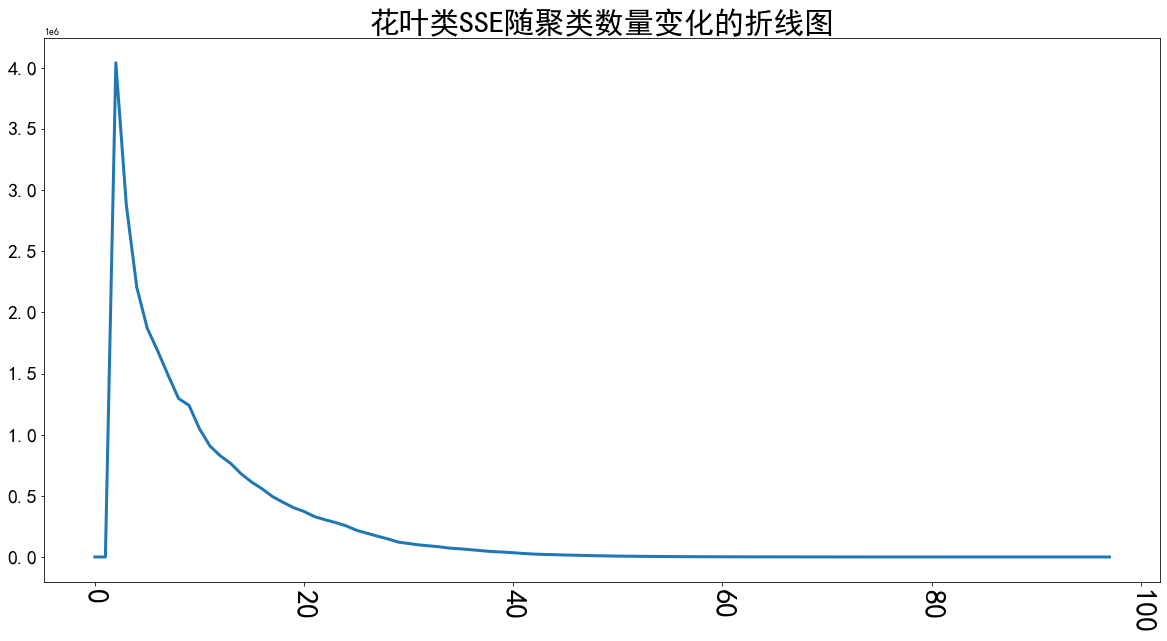

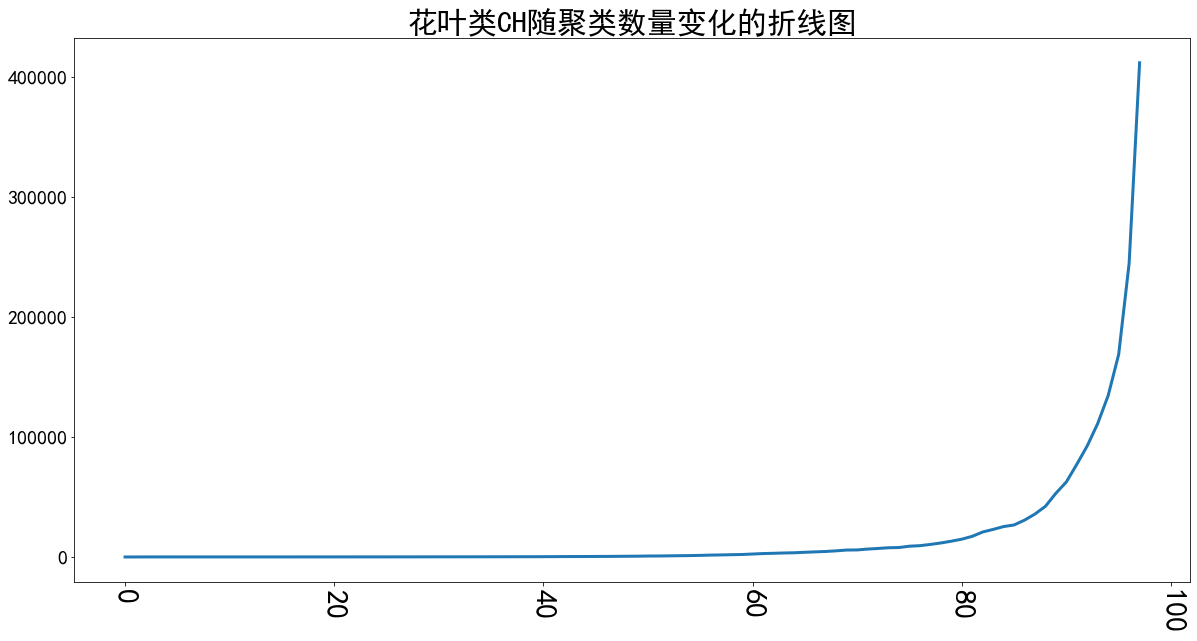

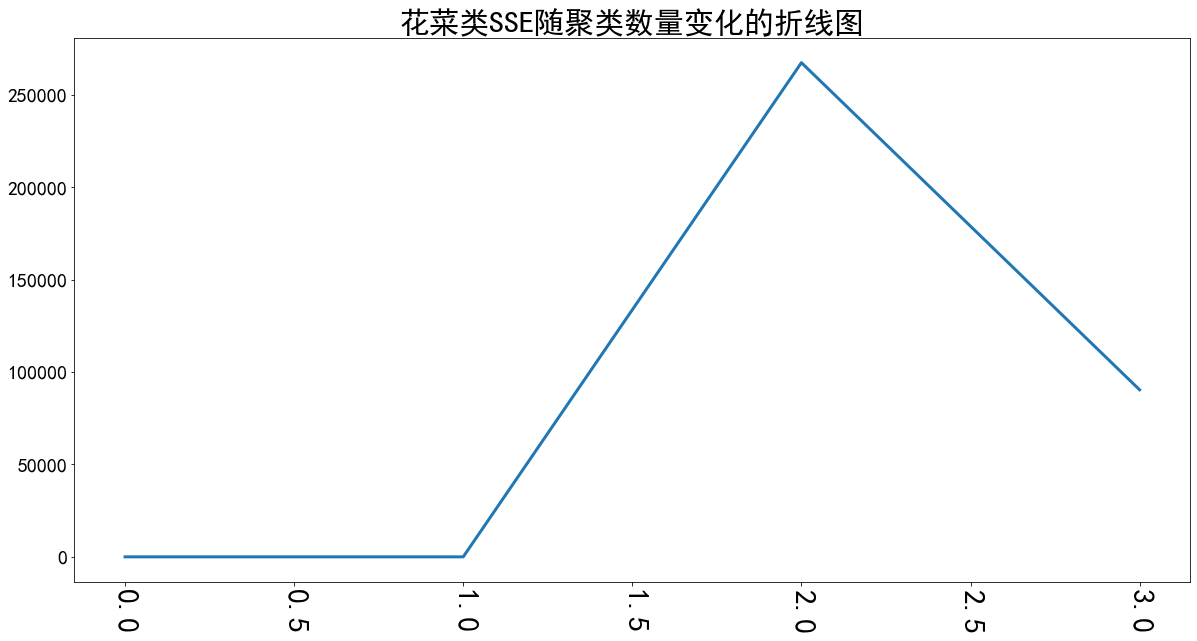

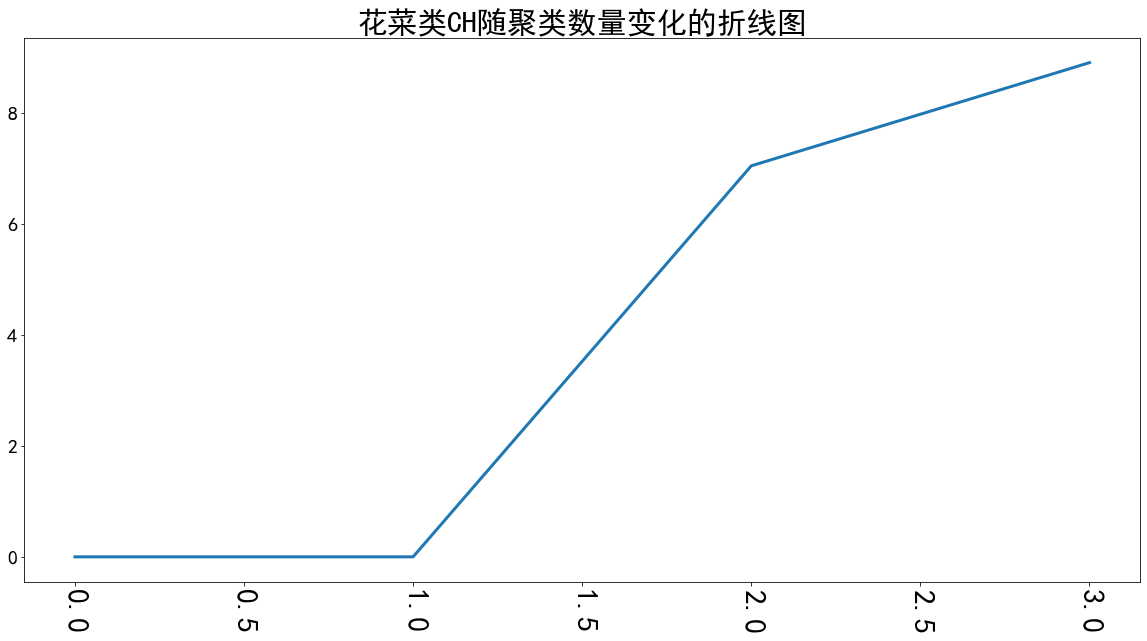

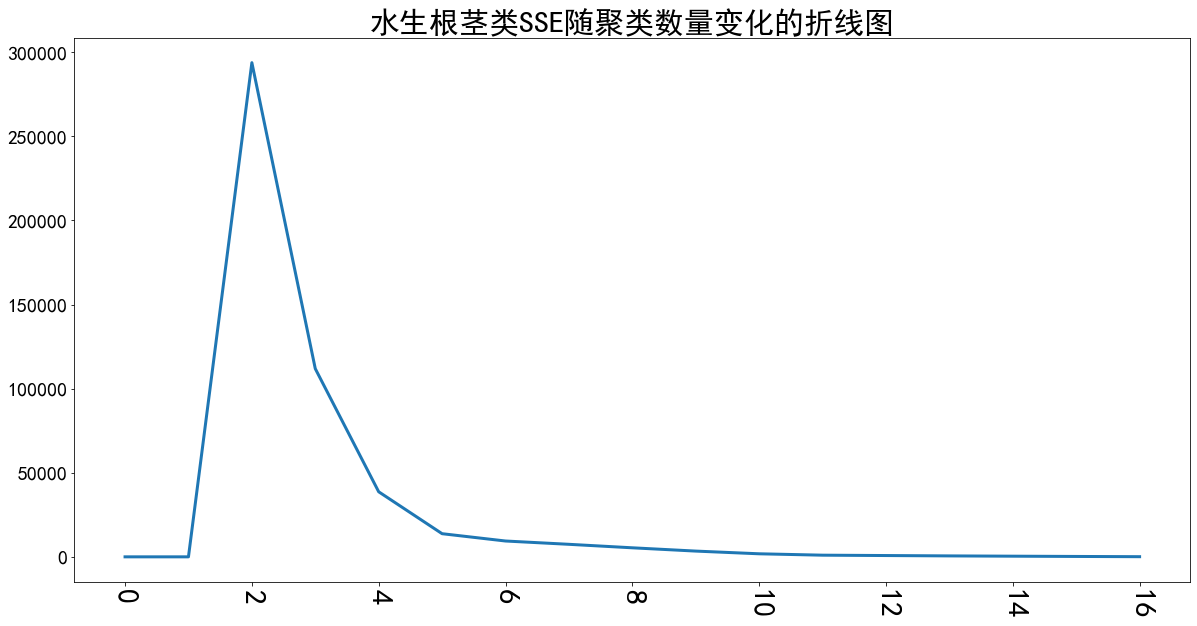

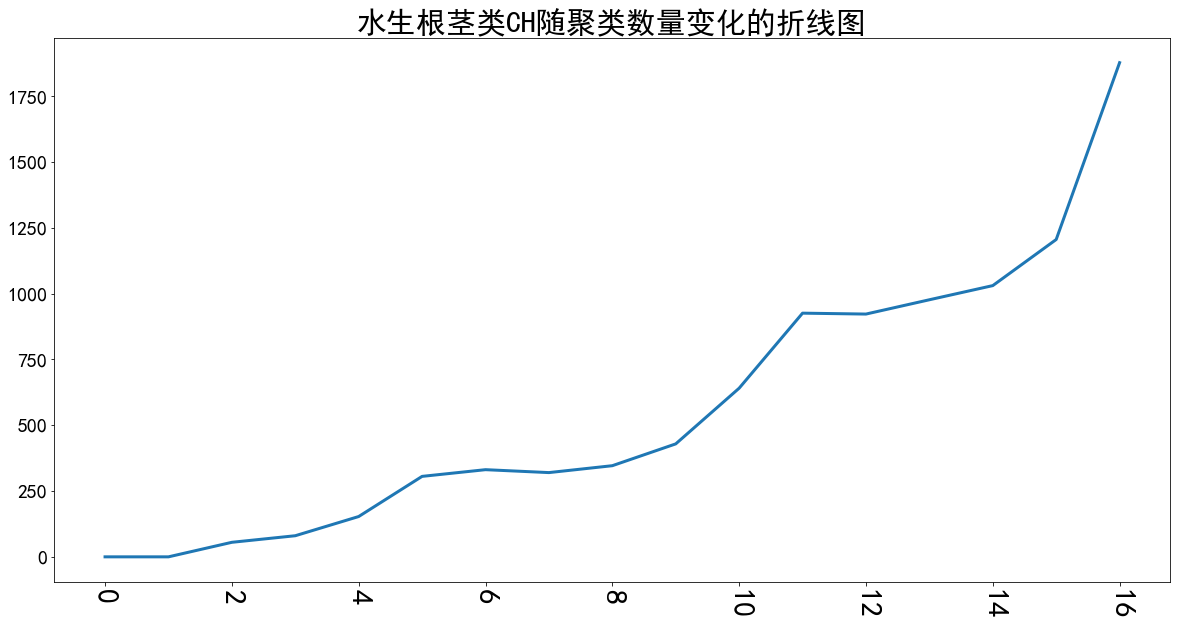

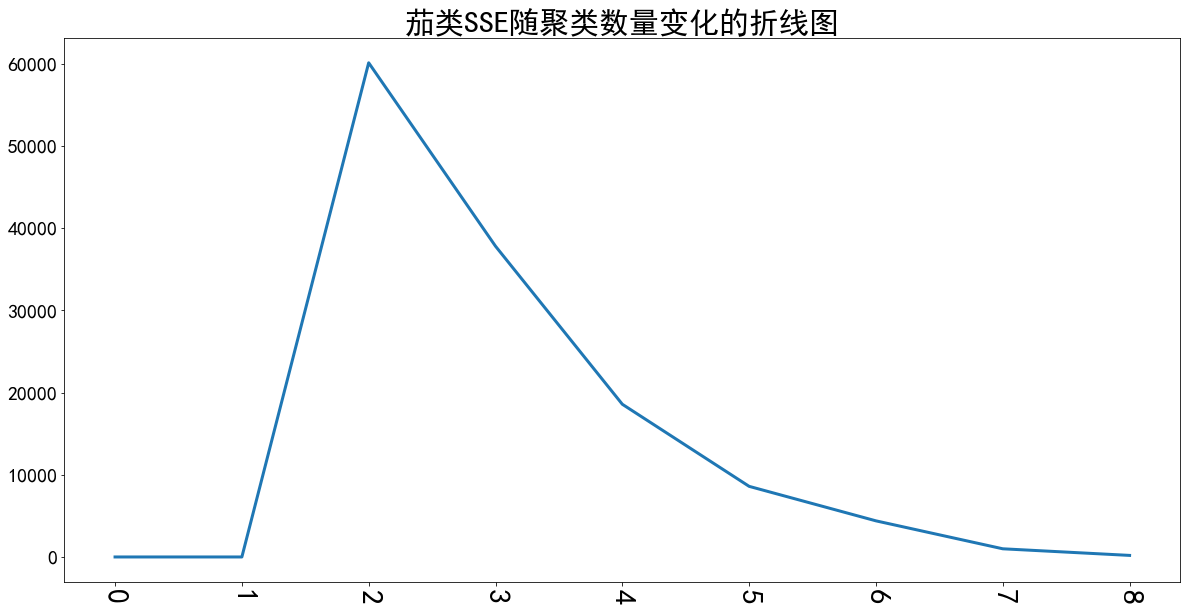

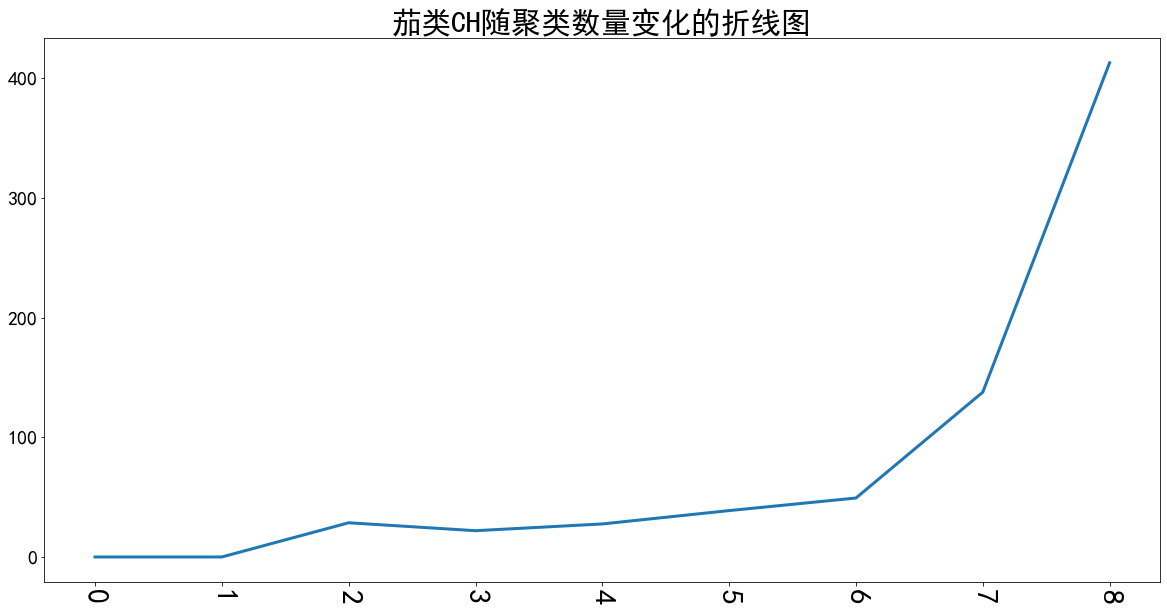

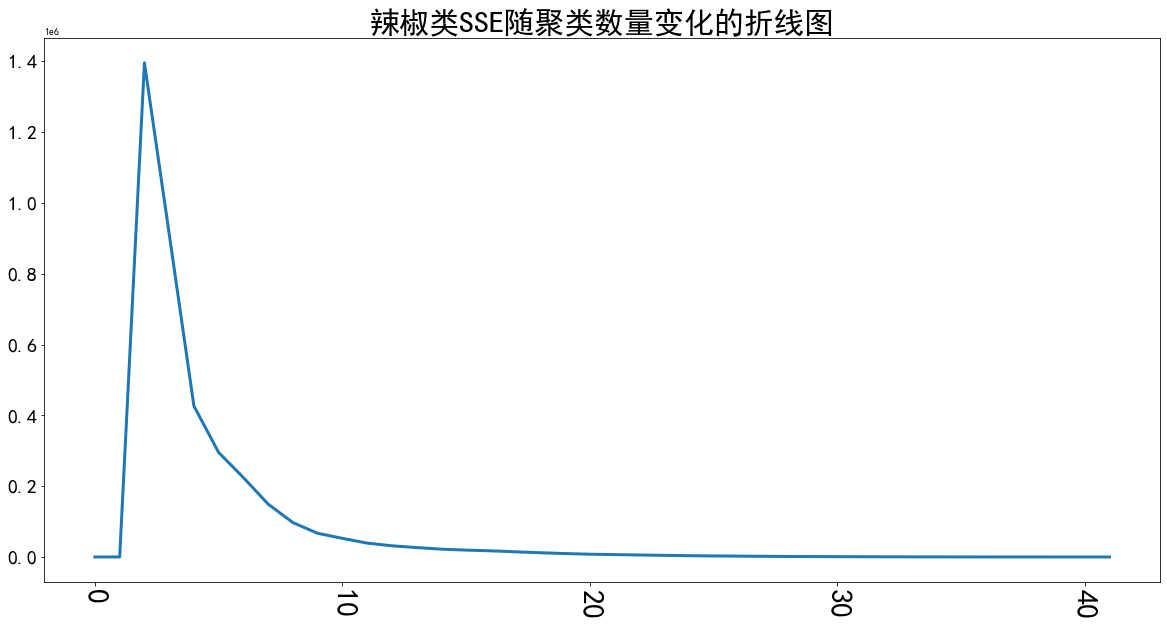

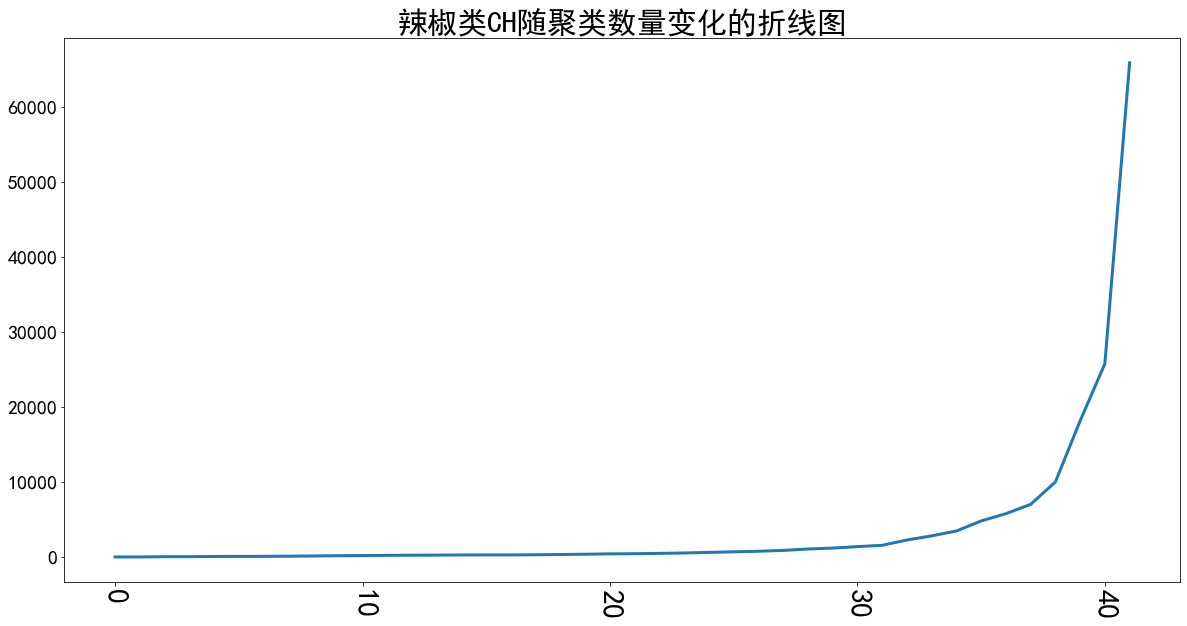

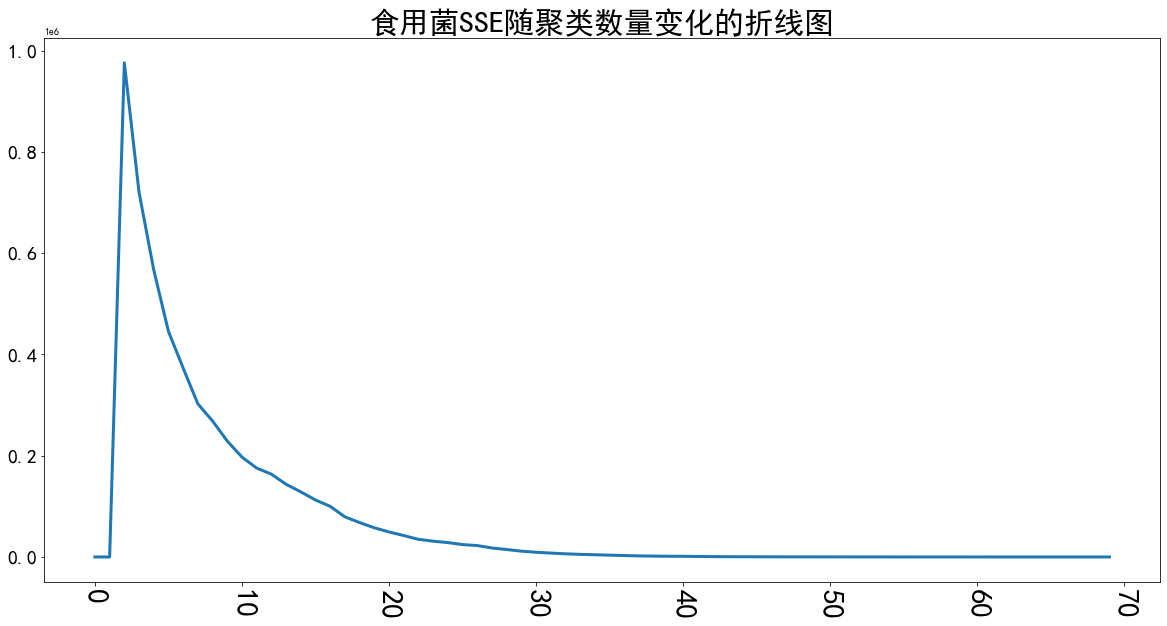

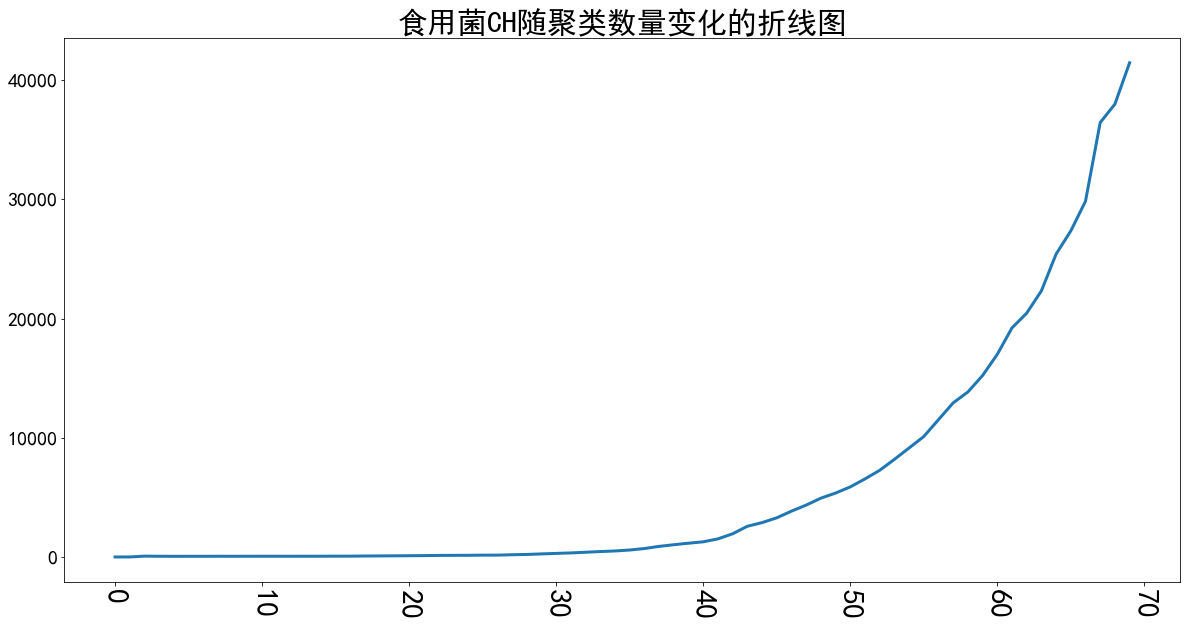

In [253]:
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    temp = pd.DataFrame([])
    for index in df:
        plrow = pl.loc[index]
        if plrow['分类名称'] == types:
            name_CN = plrow['单品名称']
            temp[name_CN] = df[index]
    X = temp.T
    from sklearn.cluster import KMeans
    SEE = np.empty(shape=(X.shape[0]-1,1))
    CH = np.empty(shape=(X.shape[0]-1,1))
    for index in range(2,X.shape[0]-1):
        km = KMeans(n_clusters=index,random_state=666)
        km.fit(X) # 无监督学习，拟合的时候不需要样本标签
        y_predict = km.predict(X)  # 预测
        SEE[index] = km.inertia_
        from sklearn.metrics import calinski_harabasz_score
        CH[index] = calinski_harabasz_score(X,y_predict)
        y_predict = pd.DataFrame(y_predict,X.T.columns)
        y_predict.rename(columns={'0':'聚类'})
        #print(y_predict)
        y_predict.to_csv('../data/Kmeans/'+types+str(index)+'Kmeans.csv',sep=',',encoding='utf_8_sig')
    import matplotlib.pyplot as plt
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    fig = plt.figure(figsize=(20,10))
    plt.xticks(rotation=270, fontsize= 30)
    plt.yticks(fontsize=20)
    plt.title(types+'SSE随聚类数量变化的折线图', fontsize= 30)
    plt.plot(SEE, linewidth = 3.0)
    plt.savefig('../data/Kmeans/LineChart/'+types+'SSE随聚类数量变化的折线图.jpg')
    plt.show()

    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    fig = plt.figure(figsize=(20,10))
    plt.xticks(rotation=270, fontsize= 30)
    plt.yticks(fontsize=20)
    plt.title(types+'CH随聚类数量变化的折线图', fontsize= 30)
    plt.plot(CH, linewidth = 3.0)
    plt.savefig('../data/Kmeans/LineChart/'+types+'CH随聚类数量变化的折线图.jpg')
    plt.show()
    #print(SEE)
    #print(CH)